In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
import time

In C:\Users\joel9\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In C:\Users\joel9\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\joel9\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In C:\Users\joel9\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\joel9\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [2]:
import sys
sys.path.append("../code")
import model_agegroups
import plotting
import plotting_agegroups
import parameters_agegroups

In [3]:
params_m1 = parameters_agegroups.get_params(country='Germany', modeltype='ramp', scenario='scenario3')
params_m2 = parameters_agegroups.get_params(country='Germany', modeltype='ramp', scenario='scenario2')
params_m3 = parameters_agegroups.get_params(country='Germany', modeltype='ramp', scenario='scenario1')
params_mFW = parameters_agegroups.get_params(country='Germany', modeltype='ramp', scenario='scenario1')
params_mFW.update( {'alpha_w': 0.0, 'alpha_u': 0.0, 'alpha_R': 0.0,} )

# Will put all of these to a parameter file soon

plateaus = np.array([3.68853681, 3.97739323, 4.265305,   4.46268227, 4.60508098, 4.75111247])
slopes = np.array([0.02306204, 0.02098712, 0.01891899, 0.01750119, 0.01647831, 0.01542934])
fractions = np.array([0.1795,0.2352,0.2488,0.2878,0.3487,0.4296])

for p in [params_m1, params_m2, params_m3, params_mFW]:
    p['CM'] = parameters_agegroups.CM_DEU
    p['plateaus'] = plateaus
    p['slopes'] = slopes
    p['fractions'] = fractions

Sapprox: 127371.52063590317
Sapprox: 68784.99630765057
Sapprox: 43800.852103956044
Sapprox: 28942.771028175128
Sapprox: 5056.555932640011
Sapprox: 286.27394705108236
Sapprox: 127371.52063590317
Sapprox: 68784.99630765057
Sapprox: 43800.852103956044
Sapprox: 28942.771028175128
Sapprox: 5056.555932640011
Sapprox: 286.27394705108236
Sapprox: 127371.52063590317
Sapprox: 68784.99630765057
Sapprox: 43800.852103956044
Sapprox: 28942.771028175128
Sapprox: 5056.555932640011
Sapprox: 286.27394705108236
Sapprox: 127371.52063590317
Sapprox: 68784.99630765057
Sapprox: 43800.852103956044
Sapprox: 28942.771028175128
Sapprox: 5056.555932640011
Sapprox: 286.27394705108236


In [4]:
params_m1

{'Rt_base': 2.5,
 'Rt_free': 5,
 'eta': 0.75,
 'kappa': 0.8,
 'sigma': 0.5,
 'gamma': array([0.09998, 0.09978, 0.09867, 0.09565, 0.09314, 0.08809]),
 'gamma_ICU': array([0.19444 , 0.19222 , 0.084745, 0.081401, 0.091355, 0.084233]),
 'delta': array([1.400e-05, 2.040e-04, 1.217e-03, 4.031e-03, 5.435e-03, 7.163e-03]),
 'rho': 0.25,
 'omega_v_b': 0.004166666666666667,
 'omega_n_b': 0.002777777777777778,
 'chi_0': array([0.6 , 0.05, 0.04, 0.03, 0.02, 0.01]),
 'chi_1': array([0.65, 0.1 , 0.08, 0.06, 0.04, 0.02]),
 'alpha_w': array([0.03, 0.03, 0.03, 0.03, 0.03, 0.03]),
 'alpha_u': array([0.02, 0.02, 0.02, 0.02, 0.02, 0.02]),
 'alpha_R': array([0.01, 0.01, 0.01, 0.01, 0.01, 0.01]),
 'e_R': 0.0,
 'e_u': 0.0,
 'e_w': 0.0,
 'vac_max': 0.005,
 'u_base': array([0.2 , 0.5 , 0.55, 0.6 , 0.65, 0.7 ]),
 'mu': 0.267,
 'd_0': 240.0,
 'd_mu': 0.0,
 'a_Rt': 4.0,
 'b_Rt': 0.7,
 'a_vac': 6.0,
 'b_vac': 0.4,
 'gamma_cutoff': 45.0,
 'tau_vac1': 42.0,
 'tau_vac2': 14.0,
 'Theta': array([2.000e-06, 1.400e-05, 1

In [5]:
m1 = model_agegroups.Model(**params_m1)
m2 = model_agegroups.Model(**params_m2)
m3 = model_agegroups.Model(**params_m3)
mFW = model_agegroups.Model(**params_mFW)

start_time = time.time()
times, data = m1.run()
times, data = m2.run()
times, data = m3.run()
times, data = mFW.run()
print(time.time() - start_time)

161.0368549823761


In [6]:
[(m.chopped_data() < 0 ).any() for m in [m1,m2,m3,mFW]]

[False, False, False, False]

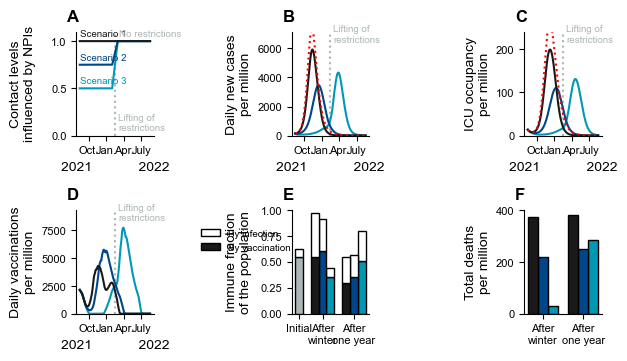

In [7]:
import importlib
importlib.reload(plotting_agegroups)
plotting_agegroups.sixpanels([m1,m2,m3], "./figures/extended_fig2.pdf", arial=True, full_wave=mFW)

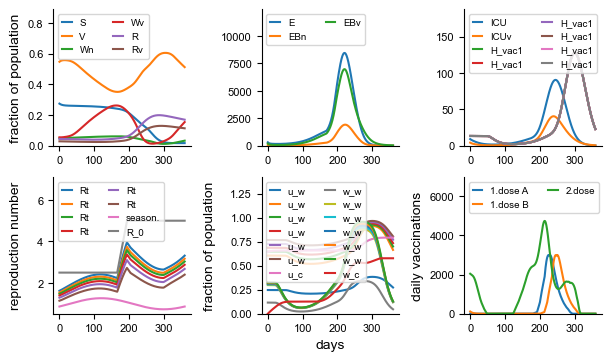

In [8]:
importlib.reload(plotting_agegroups)
plotting_agegroups.overview(m1, arial=True)

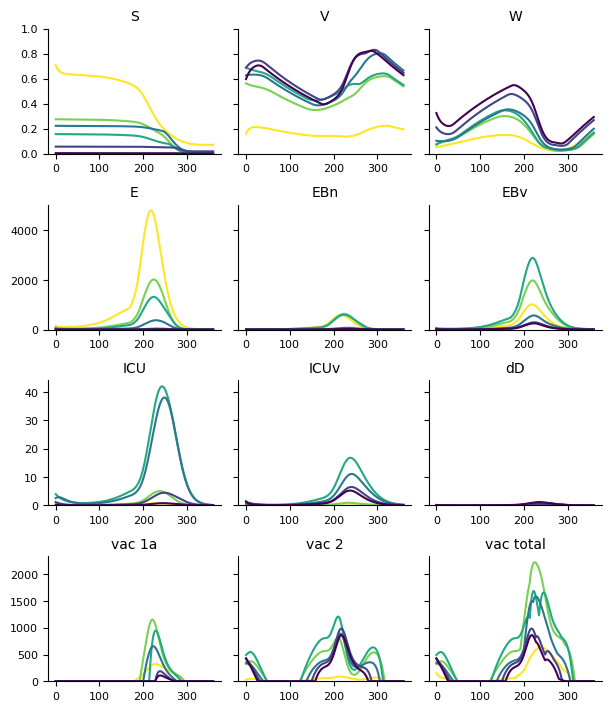

In [9]:
importlib.reload(plotting_agegroups)
plotting_agegroups.overview_agegroups(m1, path='./figures/show.pdf')